# <center>Project1 Naive Exact</center>
<center>Shengyuan Wang</center>
<center>Mar 30, 2020</center>

Implement a version of the naive exact matching algorithm that is strand-aware. That is, instead of looking only for occurrences of P in T, additionally look for occurrences of thereverse complement of P in T. If P and its reverse complement are identical (e.g. AACGTT), then a given match offset should be reported only once.

Q1. How many times does AGGT or its reverse complement ACCT occur in the lambda virus genome? E.g. if AGGT occurs 10 times and ACCT occurs 12 times, you should report 22.  
  
Q2. How many times does TTAA or its reverse complement occur in the lambda virus genome? Hint: TTAA and its reverse complement are equal, so remember not to double count.  
  
Q3. What is the offset of the leftmost occurrence of ACTAAGT or its reverse complement in the Lambda virus genome? E.g. if the leftmost occurrence of ACTAAGT is at offset 40 (0-based) and the leftmost occurrence of its reverse complement ACTTAGT is at offset 29, then report 29.  
  
Q4. What is the offset of the leftmost occurrence of AGTCGA or its reverse complement in the Lambda virus genome?

In [14]:
import os
import matplotlib.pyplot as plt


def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome


def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t


def naive_with_rc(p, t):
    p_rev = reverseComplement(p)
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if not match:
            match = True
            for j in range(len(p)):  # loop over characters
                if t[i + j] != p_rev[j]:  # compare characters
                    match = False
                    break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [15]:
genome_file = 'lambda_virus.fa'
genome = readGenome(genome_file)

# Question1
print(len(naive_with_rc('AGGT', genome)))

306


In [16]:
# Question2
print(len(naive_with_rc('TTAA', genome)))

195


In [17]:
# Question3
print(min(naive_with_rc('ACTAAGT', genome)))

26028


In [18]:
# Question4
print(min(naive_with_rc('AGTCGA', genome)))

450


Q5. Make a new version of the naive function called naive_2mm that allows up to 2 mismatches per occurrence. Unlike for the previous questions, do not consider the reverse complement here. How many times does TTCAAGCC occur in the Lambda virus genome when allowing up to 2 mismatches?  
  
Q6. What is the offset of the leftmost occurrence of AGGAGGTT in the Lambda virus genome when allowing up to 2 mismatches?

In [19]:
def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        count_mismatch = 0
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                count_mismatch += 1
        if count_mismatch <= 2:
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [20]:
# Question5
print(len(naive_2mm('TTCAAGCC', genome)))

191


In [21]:
# Question6
print(min(naive_2mm('AGGAGGTT', genome)))

49


Q7. Report which sequencing cycle has the problem. Remember that a sequencing cycle corresponds to a particular offset in all the reads.

In [22]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities


def phred33ToQ(qual):
    return ord(qual) - 33


def createHist(qualities):
    # Create a histogram of quality scores
    hist = [0]*len(qualities[0])
    for qual in qualities:
        for i in range(len(qual)):
            q = phred33ToQ(qual[i])
            hist[i] += q
    return hist

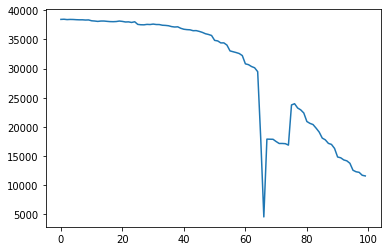

In [23]:
%matplotlib inline
reads_file = 'ERR037900_1.first1000.fastq'
_, quals = readFastq(reads_file)
qual_hist = createHist(quals)
plt.plot(range(len(qual_hist)), qual_hist)
plt.show()